 # Heart Disease Prediction Using KNN Algorithm with Optimized Accuracy
 
 
 #### By Chris Jung, Jamie Ma and Amy Wu
 
 ### Background and Motivation
- ***Heart disease*** is the leading casue of death  for men, women, and people of most racial and ethnic groups in most of countries in the world, even in the countries with developed medical technologies such as the US.<br>
About 659,000 people in the United States die from heart disease each year which accounts for 1 in every 4 deaths. It costs the United States about $363 billion each year from 2016 to 2017. [Reference 1](https://www.cdc.gov/heartdisease/facts) , [Reference 2](https://www.who.int/health-topics/cardiovascular-diseases)
- For those reasons, it would be beneficial for both our society and individuals if we can analyze the factors causing heart disease, predict heart disease using the analysis and prevent it from happening beforehand. 

### Project Goal
- For this reason, we are going to use actual medical records from Cleveland to make a **heart disease prediction model** using the K-nearest neighbors (KNN) classification algorithm.
- Furthermore, we will **optimize the accuracy** of our model by tuning the parameters of KNN models, such as the choice of predictors and the value of K. By adjusting the number and the specific set of predictors, we will also find which factors are more useful to predict heart disease.


### Data
- The dataset is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- Each observation contains **a person's medical information** including the presence of heart disease (The original data contains 76 attributes, but we will use a subset of 14 of them as sugguested in the original source of data)
- 14 Attributes of the data:
    1. age: age of the person in years
    2. sex: 1 = male; 0 = female
    3. cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5. chol: serum cholestoral in mg/dl
    6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results(Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
    8. thalach: maximum heart rate achieved in bpm(Beat Per Minute)
    9. exang: exercise induced angina (1 = yes; 0 = no)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    12. ca: umber of major vessels (0-3) colored by flourosopy
    13. thal: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    14. class: presence of heart disease. integer valued from 0 (no presence) to 4
##### What combination of the 13 predictors in the data set lead to the most accurate predictions of classifying the correct **class** of heart disease?

In [2]:
#loads the libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
#options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

### Reading the Data

In [3]:
#sets the seed
set.seed(1)

#reads in the data table with all 76 attributes
cleveland_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data",
                col_names = paste(1:8),
                col_type = c("5" = "d"),
                delim = " ")

Warning message:
“1102 parsing failures.
row col  expected    actual                                                                                     file
  1  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  -- 8 columns 5 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 11  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 20  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
... ... ......... ......... ........................................................................................
See problems(...) for more details.
”


### Wrangling the Data

In [4]:
#adding an index column to the data frame for wrangling purposes
cleveland_data <- cleveland_data %>%
        mutate(index = as.numeric(rownames(cleveland_data))) %>%
        filter(index <= 2820) #excluding data after the 2820th row, as the data is unusable because there is too much missing data


#creates an individual data frame for each subsection of data
#cleveland
cleveland_section_1 <- cleveland_data %>%
            filter((index - 1) %% 10 == 0) %>%
            select(-"8") #removing columns that have no values
cleveland_section_2 <- cleveland_data %>%
            filter((index - 1) %% 10 == 1) %>%
            mutate(index = index - 1)
cleveland_section_3 <- cleveland_data %>%
            filter((index - 1) %% 10 == 2) %>%
            mutate(index = index - 2)
cleveland_section_4 <- cleveland_data %>%
            filter((index - 1) %% 10 == 3) %>%
            mutate(index = index - 3)
cleveland_section_5 <- cleveland_data %>%
            filter((index - 1) %% 10 == 4) %>%
            mutate(index = index - 4)
cleveland_section_6 <- cleveland_data %>%
            filter((index - 1) %% 10 == 5) %>%
            mutate(index = index - 5)
cleveland_section_7 <- cleveland_data %>%
            filter((index - 1) %% 10 == 6) %>%
            mutate(index = index - 6)
cleveland_section_8 <- cleveland_data %>%
            filter((index - 1) %% 10 == 7) %>%
            mutate(index = index - 7)
cleveland_section_9 <- cleveland_data %>%
            filter((index - 1) %% 10 == 8) %>%
            mutate(index = index - 8)
cleveland_section_10 <- cleveland_data %>%
            filter((index - 1) %% 10 == 9) %>%
            mutate(index = index - 9) %>%
            select(-"5",-"6",-"7",-"8") #removing columns that have no values




#combines all of the individual data tables into one data table
#cleveland
cleveland_data_merge <- merge(cleveland_section_1, cleveland_section_2, by="index") %>%
            merge(cleveland_section_3, by = "index") %>%
            merge(cleveland_section_4, by = "index") %>%
            merge(cleveland_section_5, by = "index") %>%
            merge(cleveland_section_6, by = "index") %>%
            merge(cleveland_section_7, by = "index") %>%
            merge(cleveland_section_8, by = "index") %>%
            merge(cleveland_section_9, by = "index") %>%
            merge(cleveland_section_10, by = "index")


#creates a list that contains the index column name
cnames <- c("index")

#numbers the columns 1 to max
for (i in 1:(ncol(cleveland_data_merge)-1)){
    if (i == 58){
        cnames <- c(cnames, c("diagnosis"))  #renames the 
    } else {
        cnames <- c(cnames, paste("Stat", c(i)))
    }
}

#renames the column names to the appriate ones
colnames(cleveland_data_merge) <- cnames

#removes the index column and makes the diagnosis column a class
heart_data_all <- select(cleveland_data_merge, -index) %>%
            mutate(diagnosis = as_factor(diagnosis))

Warning message in merge.data.frame(., cleveland_section_4, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., cleveland_section_5, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘8.y’ are duplicated in the result”
Warning message in merge.data.frame(., cleveland_section_6, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘8.y’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., cleveland_section_7, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x

In [5]:
#creates a data table with only the 14 attributes listed in published experiments
heart_data <- heart_data_all %>%
            select("Stat 3", "Stat 4", "Stat 9", "Stat 10", "Stat 12", "Stat 16", "Stat 19", "Stat 32", "Stat 38", 
                   "Stat 40", "Stat 41", "Stat 44", "Stat 51", diagnosis)

#renames the columns
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
                          "slope", "ca", "thal", "Class")

#standardizes the variables
# heart_data_attributes <- heart_data_attributes %>% 
#     mutate(age = scale(age, center = T),
#           chol = scale(chol, center = T))
# heart_data_attributes

head(heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [6]:
#splits the data into training and test data
heart_split <- initial_split(heart_data, prop = 0.75, strata = Class)
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

### Summarizing the Data

In [7]:
#creates a table that displays the count and percentage of each class in the training data
heart_proportions <- heart_train %>%
                      group_by(Class) %>%
                      summarize("count" = n()) %>%
                      mutate(percent = 100*count/nrow(heart_train))
heart_proportions


#creates a data table with the mean, median, min, and max values of each of the variables
heart_averages_1 <- heart_train %>%
                    select(-Class) %>%
                    map_df(median) %>% 
                    mutate(Stat = "median")
heart_averages_2 <- heart_train %>%
                    select(-Class) %>%
                    map_df(mean) %>%
                    t() %>%
                    round(digits = 2) %>%
                    t() %>%
                    as.tibble() %>%
                    mutate(Stat = "mean")
heart_averages_3 <- heart_train %>%
                    select(-Class) %>%
                    map_df(min) %>% 
                    mutate(Stat = "min")
heart_averages_4 <- heart_train %>%
                    select(-Class) %>%
                    map_df(max) %>% 
                    mutate(Stat = "max")

#combines all of the statistical measurements into one table
heart_averages <- rbind(heart_averages_1, heart_averages_2, heart_averages_3, heart_averages_4)
heart_averages

`summarise()` ungrouping output (override with `.groups` argument)



Class,count,percent
<fct>,<int>,<dbl>
0,118,55.660377
1,38,17.924528
2,22,10.377358
3,24,11.320755
4,10,4.716981


Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Stat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
55.00,1.00,3.00,130.00,244.00,0.00,2.00,154.50,0.00,0.65,1.00,0.00,3.00,median
54.64,0.69,3.17,131.28,246.15,0.16,1.05,149.67,0.32,0.96,1.54,0.65,4.48,mean
29.00,0.00,1.00,94.00,126.00,0.00,0.00,96.00,0.00,0.00,1.00,-9.00,-9.00,min
77.00,1.00,4.00,200.00,417.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,max


### Visualization the Data

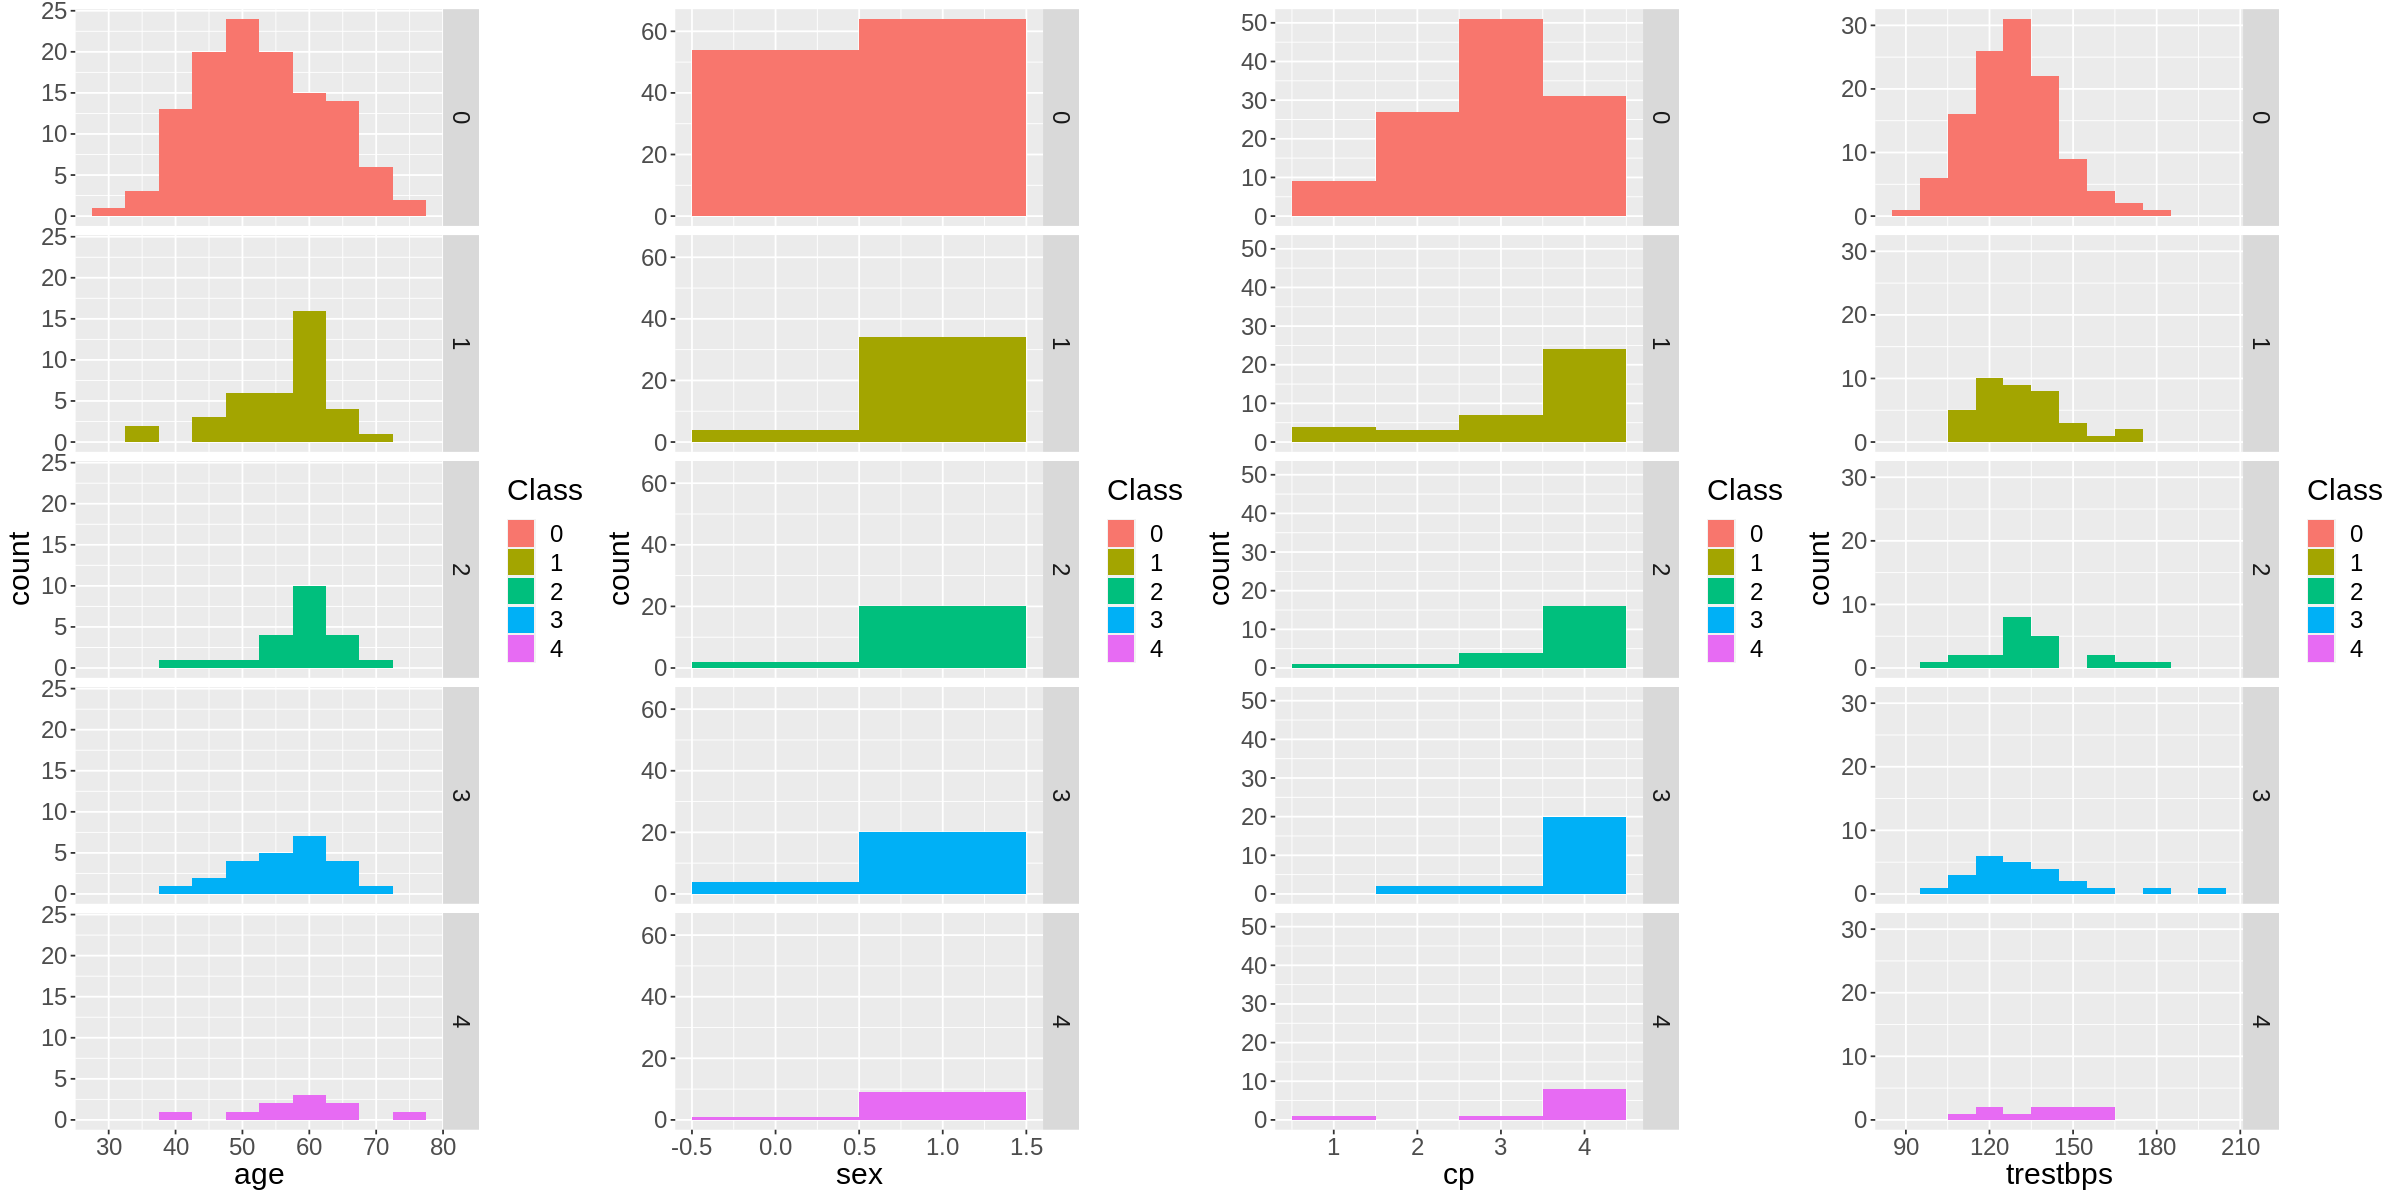

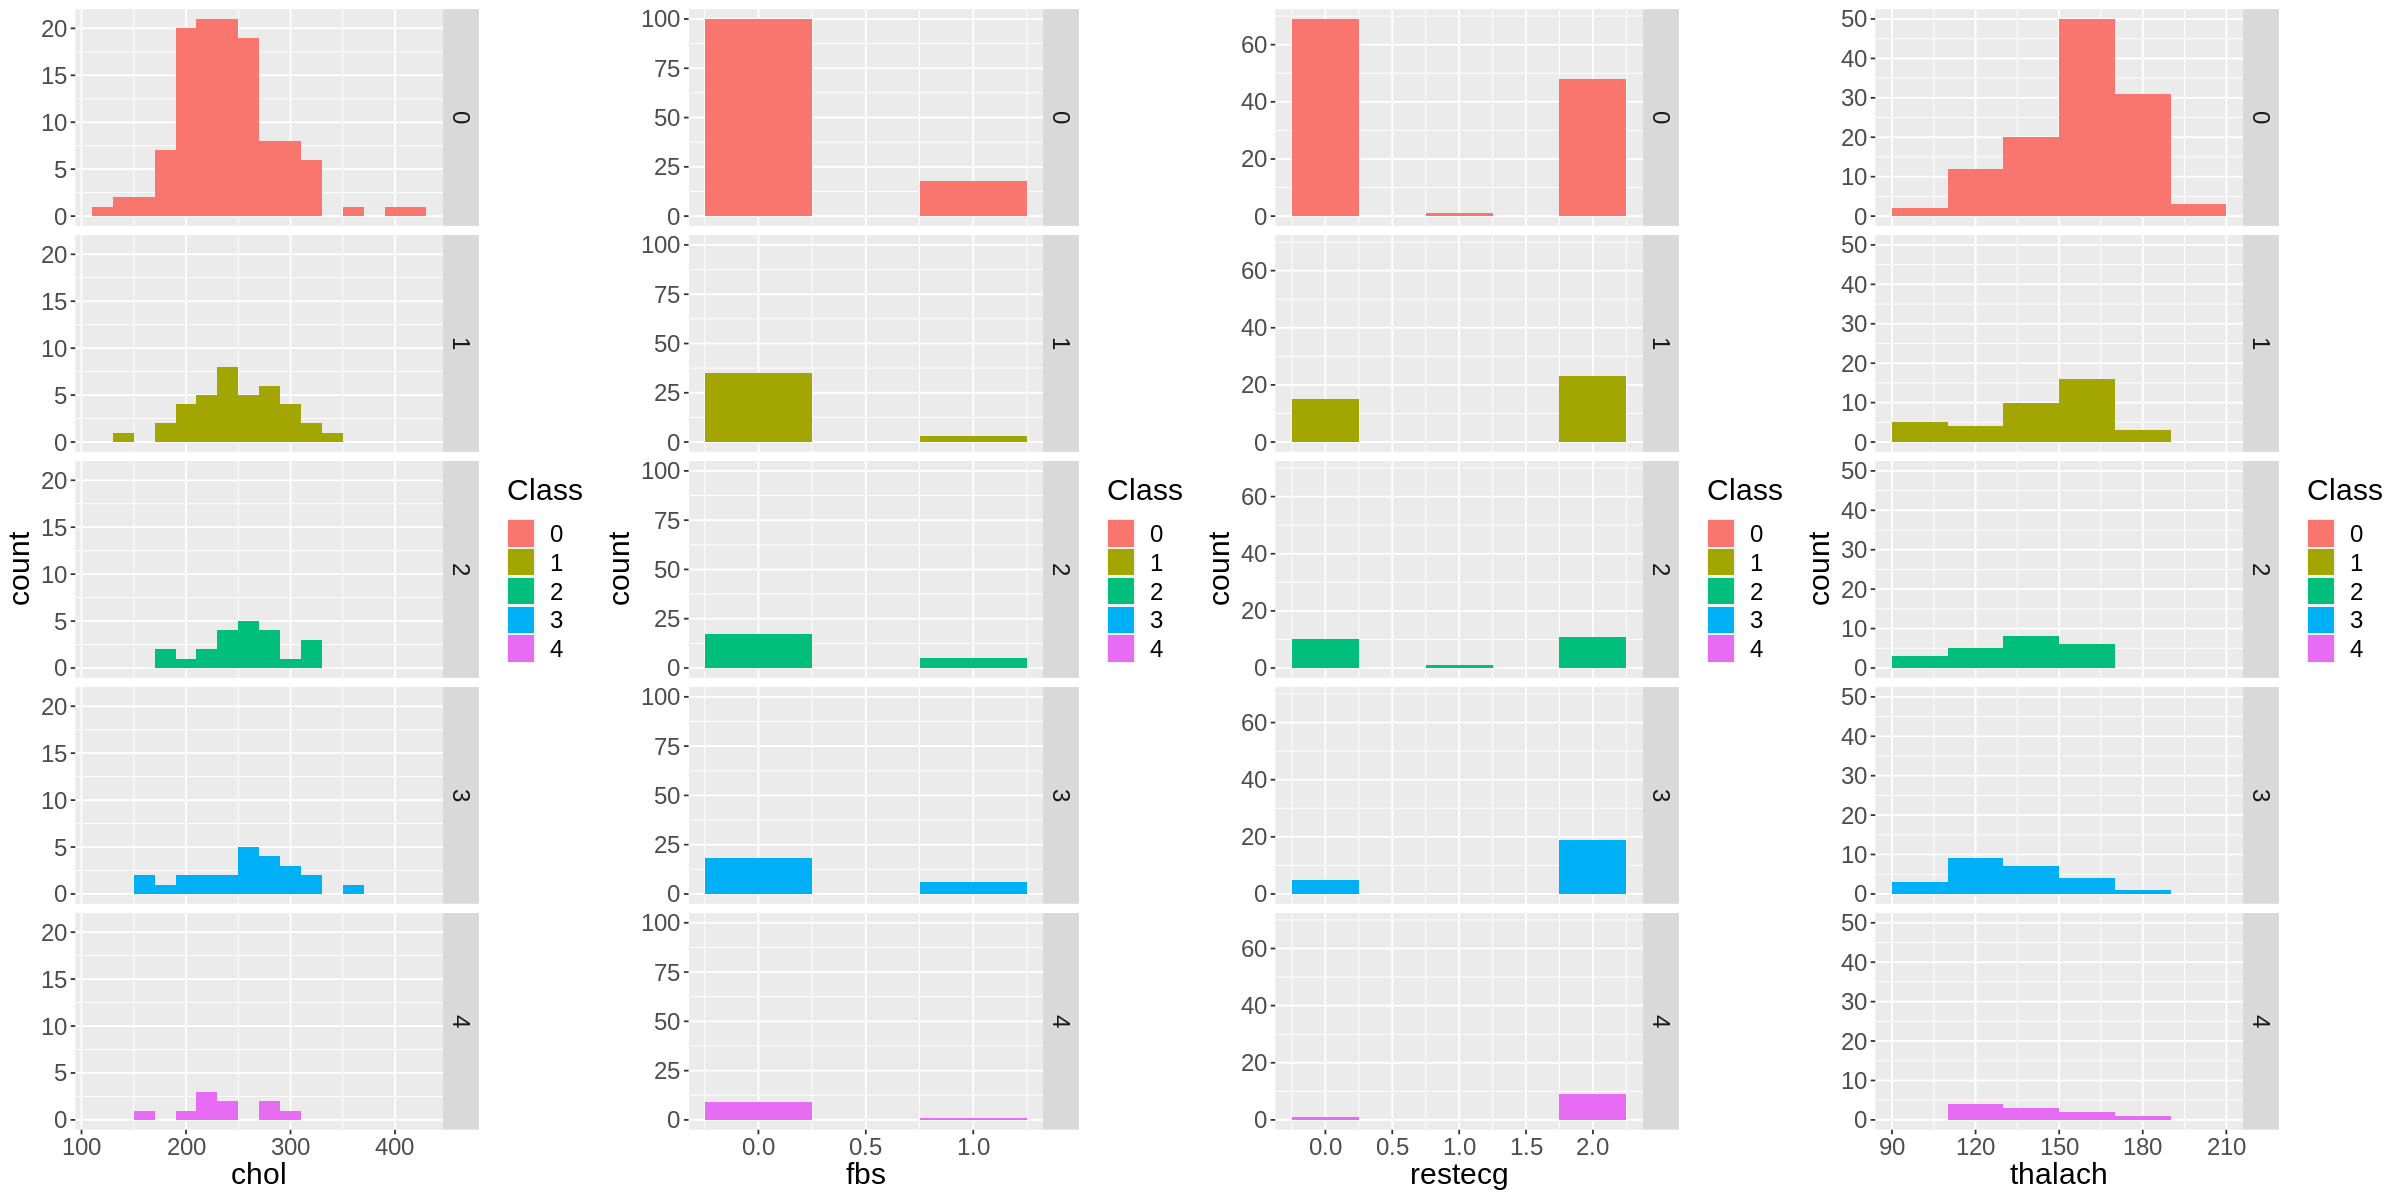

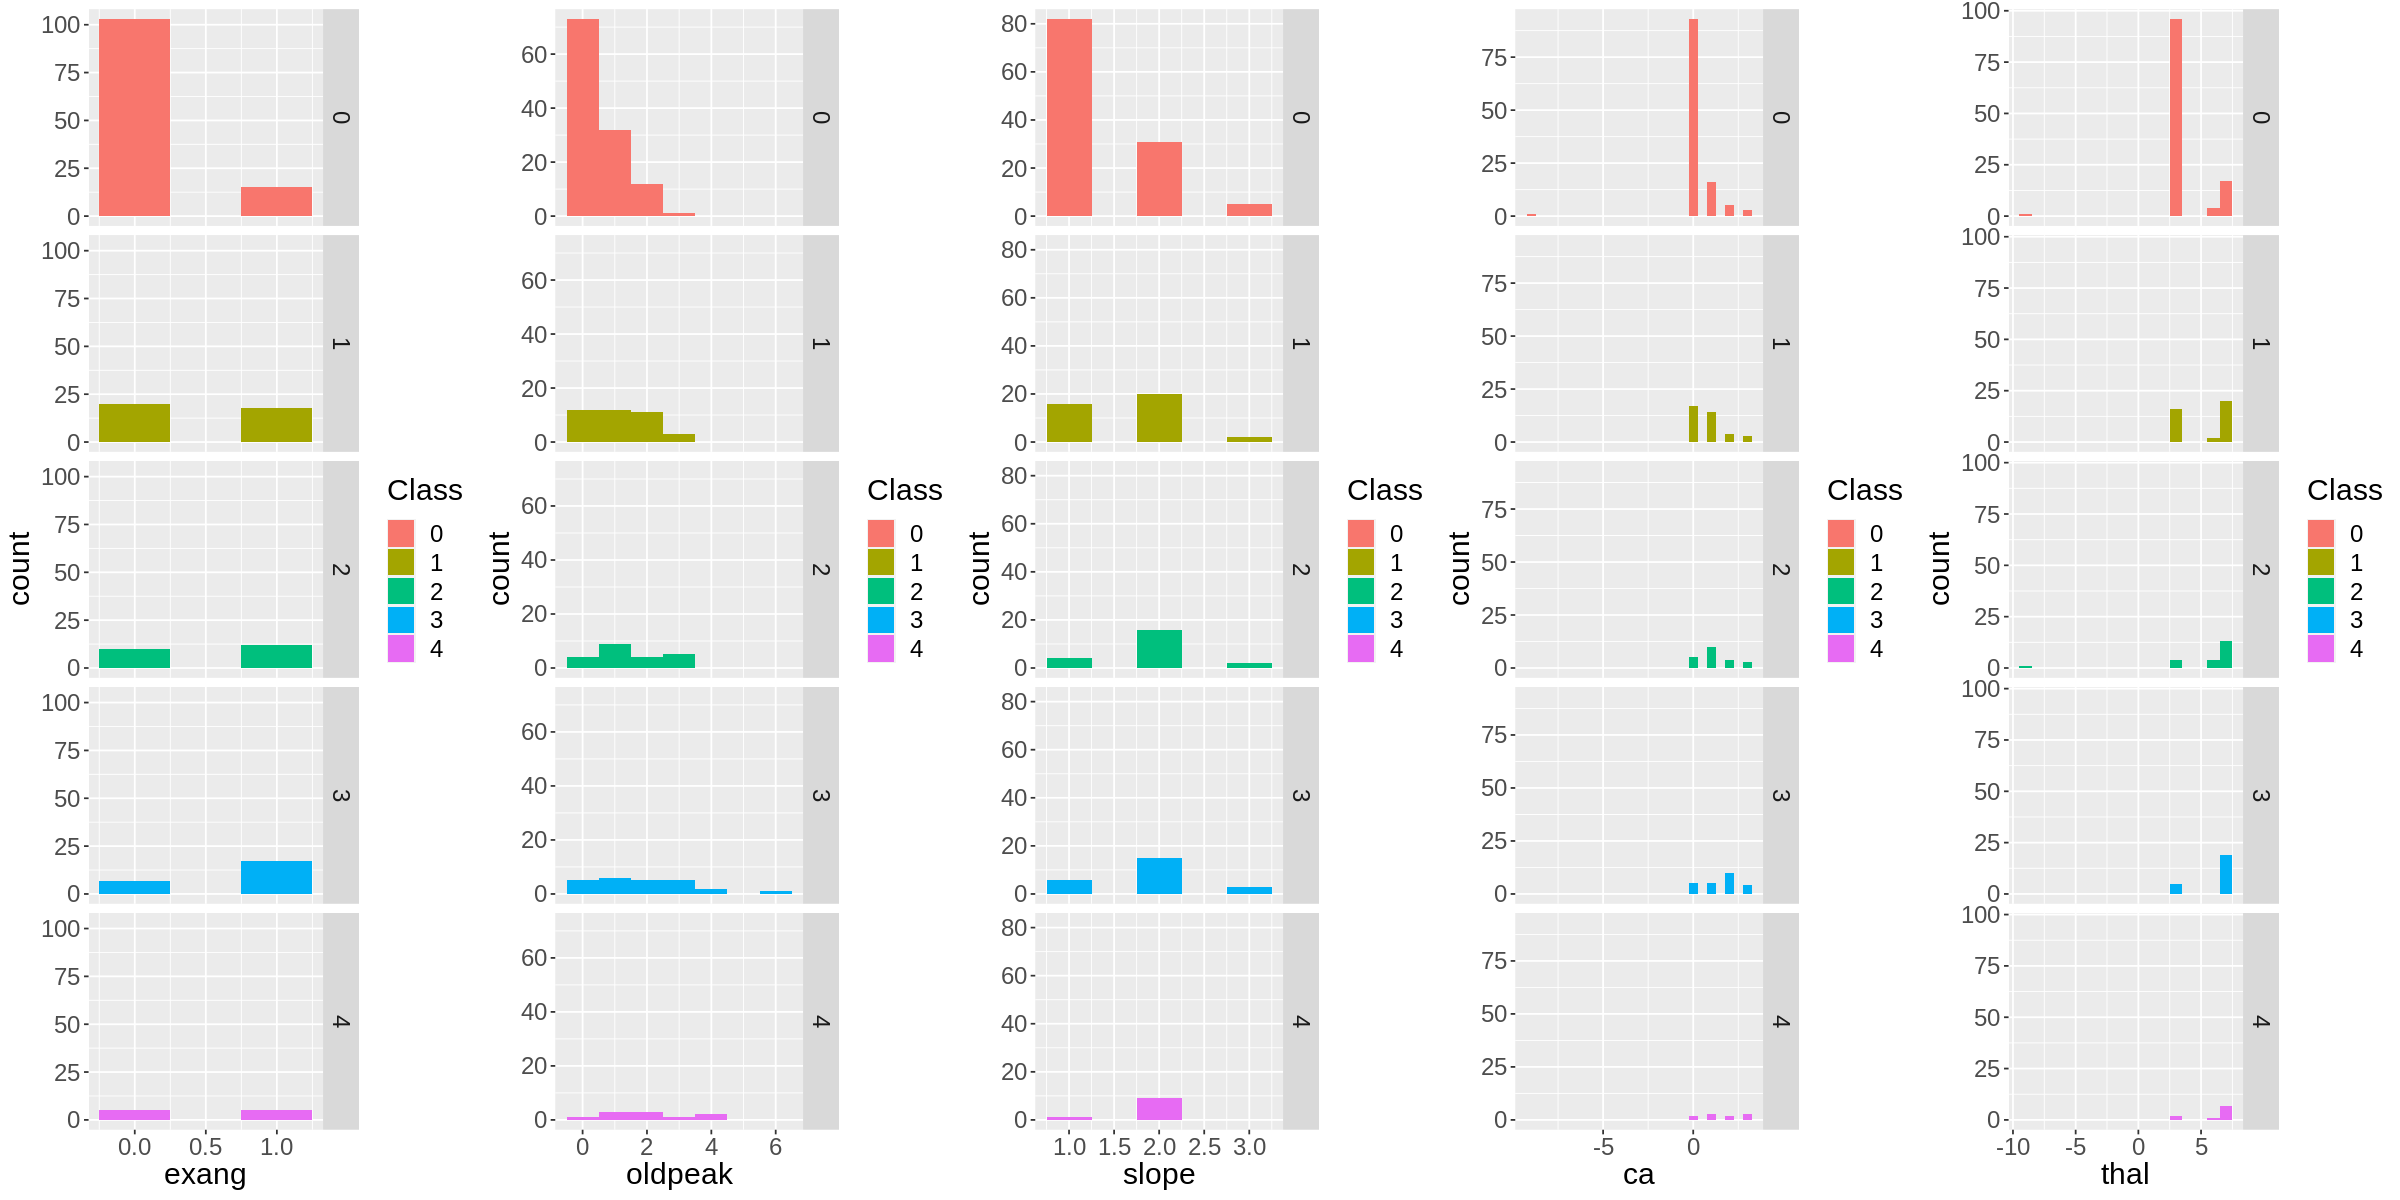

In [8]:
options(repr.plot.width = 20, repr.plot.height = 10)

#plots for each individual predictor
age_plot <- ggplot(heart_train, aes(x=age, fill = Class)) +
            geom_histogram(binwidth = 5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
sex_plot <- ggplot(heart_train, aes(x=sex, fill = Class)) +
            geom_histogram(binwidth = 1) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
cp_plot <- ggplot(heart_train, aes(x=cp, fill = Class)) +
            geom_histogram(binwidth = 1) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
trestbps_plot <- ggplot(heart_train, aes(x=trestbps, fill = Class)) +
            geom_histogram(binwidth = 10) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
chol_plot <- ggplot(heart_train, aes(x=chol, fill = Class)) +
            geom_histogram(binwidth = 20) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
fbs_plot <- ggplot(heart_train, aes(x=fbs, fill = Class)) +
            geom_histogram(binwidth = 0.5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
restecg_plot <- ggplot(heart_train, aes(x=restecg, fill = Class)) +
            geom_histogram(binwidth = 0.5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
thalach_plot <- ggplot(heart_train, aes(x=thalach, fill = Class)) +
            geom_histogram(binwidth = 20) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
exang_plot <- ggplot(heart_train, aes(x=exang, fill = Class)) +
            geom_histogram(binwidth = 0.5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
oldpeak_plot <- ggplot(heart_train, aes(x=oldpeak, fill = Class)) +
            geom_histogram(binwidth = 1) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
slope_plot <- ggplot(heart_train, aes(x=slope, fill = Class)) +
            geom_histogram(binwidth = 0.5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
ca_plot <- ggplot(heart_train, aes(x=ca, fill = Class)) +
            geom_histogram(binwidth = 0.5) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
thal_plot <- ggplot(heart_train, aes(x=thal, fill = Class)) +
            geom_histogram(binwidth = 1) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))

#combined plot
grid.arrange(age_plot,sex_plot,cp_plot,trestbps_plot,ncol = 4)
grid.arrange(chol_plot,fbs_plot,restecg_plot,thalach_plot,ncol = 4)
grid.arrange(exang_plot,oldpeak_plot,slope_plot,ca_plot,thal_plot,ncol = 5)

### Methods

#### Data Analysis
As discussed in the introduction, we will be using a subset of the 13 attributes to create a K-nearest neighbors classifier that accurately predicts the class of heart disease of a new patient. As displayed in the visualizations, each predictor has a different distribution depending on the class. Because of this, we will want to use methods such as forward selection to help us determine which of these predictors improves the accuracy of our model. Since methods like forward selection take more time as the number of predictors increase, we will need to carefully select variables that actually hold significance towards predicting the class of heart disease. One observation regarding the predictors that we can make based on the visualizations is that it appears many of the predictors have data that acts like classes. For example, sex is either a 0 or 1. Due to this, when we proceed with our data analysis, we will want to remove some of these predictors because they do not provide as much useful information as others that can have a range of values. 

When making the K-nearest neighbor classifier, we will want to ensure that all of the predictors have been standardized before proceeding. Then, we will want to tune the classifier to figure out which K-value is the most accurate, as well as which predictors lead to the highest accuracy. By using a process such as forward selection, we hope to generate many possible combinations of predictors in order to determine which subset of them leads to the heighest estimated accuracy. Afterwards, we can test our classifier with the test data to determine how accurate it truly is.
#### Visualizations
Depending on how many predictors end up resulting in the most accurate classifier, we will have to use different visualization methods to display the data. One way that we can visualize the results is by picking two of the predictors that have clear boundaries between the classes and plotting them on a scatter plot with the points coloured based on the class.

Below is an example of a scatter plot displaying maximum heart rate and blood pressure between the classes of 0 and 4.

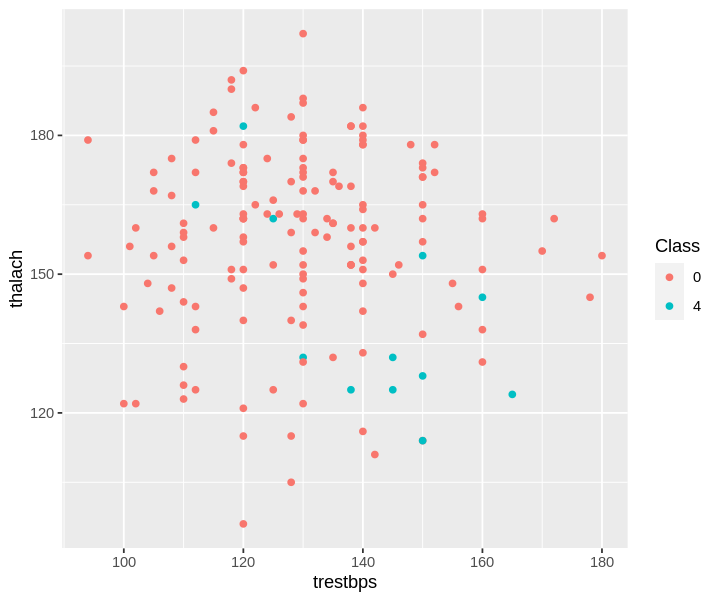

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5)
d <- filter(heart_data, Class == 0 | Class == 4)
ggplot(d, aes(x=trestbps,y=thalach,color=Class)) +
    geom_point()

### Outcomes and Significance
As outlined in the introduction, with this project we want to determine which variables are good predictors for our KNN classifier. Then, using those predictors, we can create an accurate classifier to detect the different classes of heart disease. Should this classifier be accurate, it could have profound effects on the medical world, as we would be able to detect different stages of heart disease using general medical data about an individual. In addition, we could also extend this classifier to attempt to classify other forms of common diseases such as cancer.

When using the KNN classifier in our project, every point will have the same weight. One thing that we could consider for future versions of the classifier is, does weighting the points based on how close they are to the new observation increase the accuracy of the classifier?